# Escalado
Conjunto de datos: iris (incluido en sklearn)
Este conjunto de datos es compacto y perfecto para demostrar técnicas de escalado.

In [2]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el conjunto de datos
iris = load_iris(as_frame=True)
data = iris.data

In [4]:
# Visualizar las estadísticas iniciales
print("Estadísticas iniciales:")
data.describe()

Estadísticas iniciales:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Aplicar MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmax = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)

In [6]:
# Aplicar StandardScaler
standard_scaler = StandardScaler()
data_standard = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre las estadísticas originales y las del escalado MinMax?


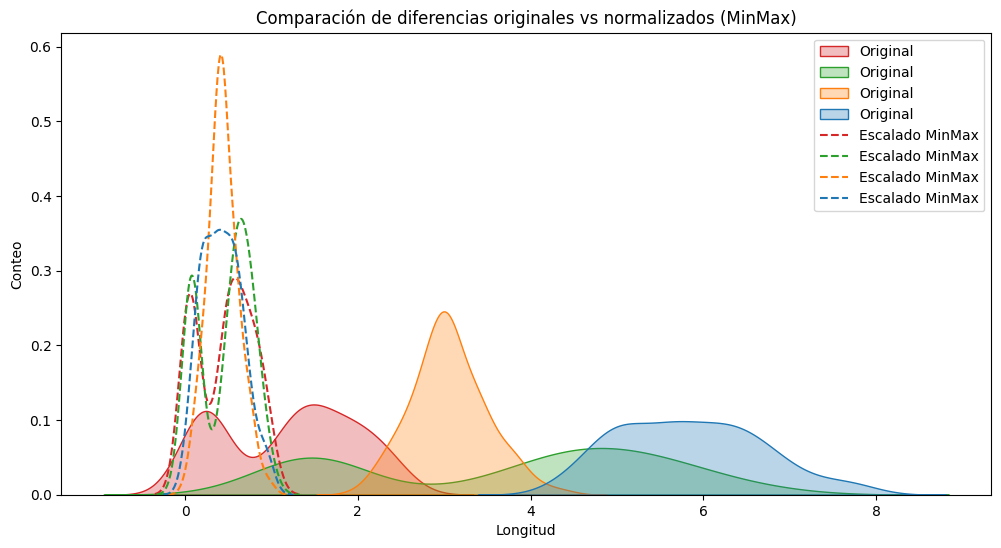

In [18]:
plt.figure(figsize=(12,6))

sns.kdeplot(data, label='Original', fill=True, alpha=0.3)
sns.kdeplot(data_minmax, label='Escalado MinMax', linestyle='--')
plt.title('Comparación de diferencias originales vs normalizados (MinMax)')
plt.xlabel('Longitud')
plt.ylabel('Conteo')
plt.legend()

Se observa que los datos se transformaron en una escala entre 0 y 1, a diferencia de las escalas en centrímetros, lo que permite observar su correlación en cuanto a tamaño.

Esto permite al modelo poder dimensionar los datos como escalas probabilísticas, lo que evita que valores altos tomen más relevancia. Permite a los algoritmos razonar de manera más cercana a la realidad.

Text(0, 0.5, 'Conteo')

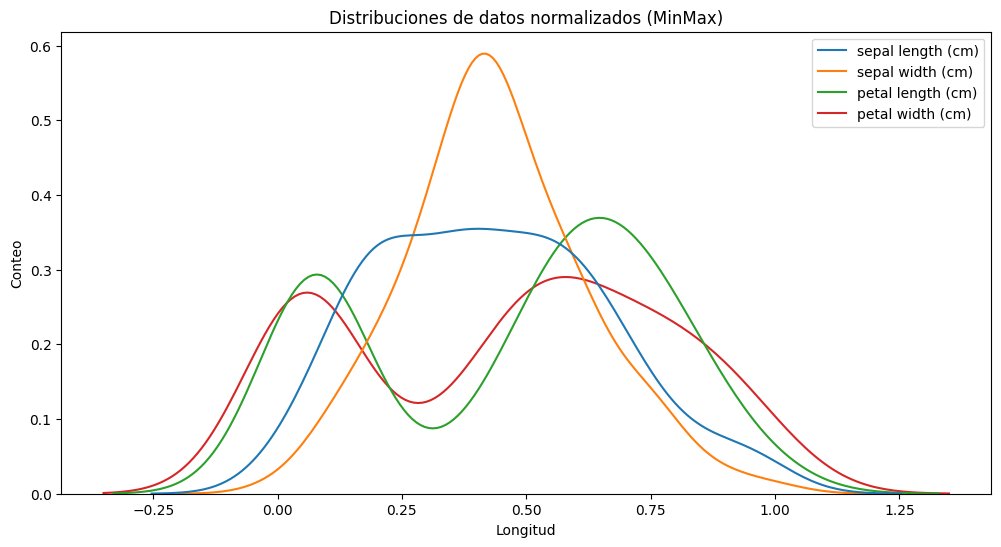

In [8]:
plt.figure(figsize=(12,6))
sns.kdeplot(data_minmax)
plt.title('Distribuciones de datos normalizados (MinMax)')
plt.xlabel('Longitud')
plt.ylabel('Conteo')

### 2. Crea una gráfica de la distribución de la variable 'sepal length (cm)' antes y después del escalado.

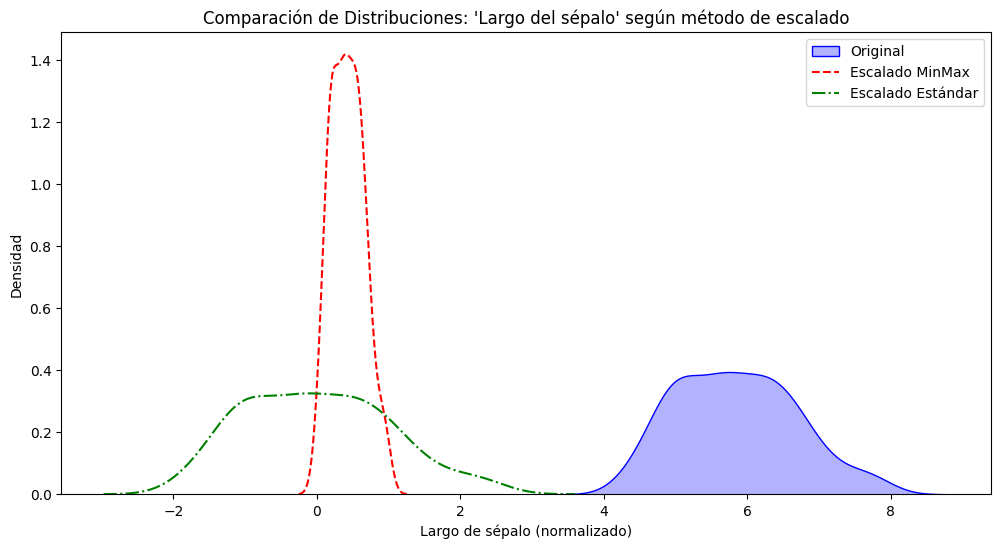

In [9]:
plt.figure(figsize=(12, 6))

# Histogramas superpuestos
sns.kdeplot(data['sepal length (cm)'], label='Original', fill=True, color="blue", alpha=0.3)
sns.kdeplot(data_minmax['sepal length (cm)'], label='Escalado MinMax', color="red", linestyle="--")
sns.kdeplot(data_standard['sepal length (cm)'], label='Escalado Estándar', color="green", linestyle="-.")

plt.title("Comparación de Distribuciones: 'Largo del sépalo' según método de escalado")
plt.xlabel('Largo de sépalo (normalizado)')
plt.ylabel('Densidad')
plt.legend()

### 3. Crea una gráfica de dispersión entre 'sepal length (cm)' y 'sepal width (cm)' con los datos escalados por StandardScaler.

Text(0, 0.5, 'Ancho del sépalo')

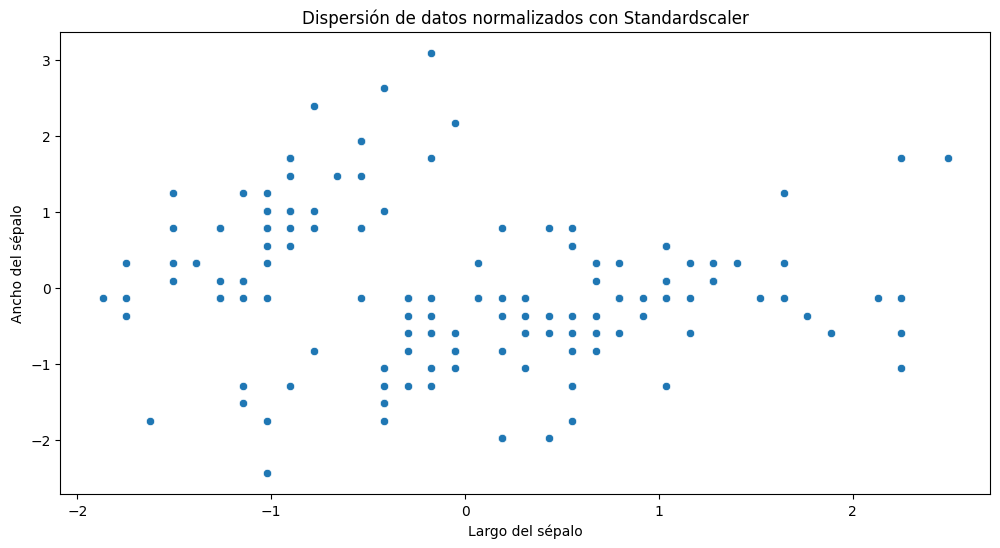

In [10]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data_standard, x='sepal length (cm)', y='sepal width (cm)')
plt.title('Dispersión de datos normalizados con Standardscaler')
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')

### 4. ¿Qué técnica de escalado crees que es más adecuada para este conjunto de datos? ¿Por qué?

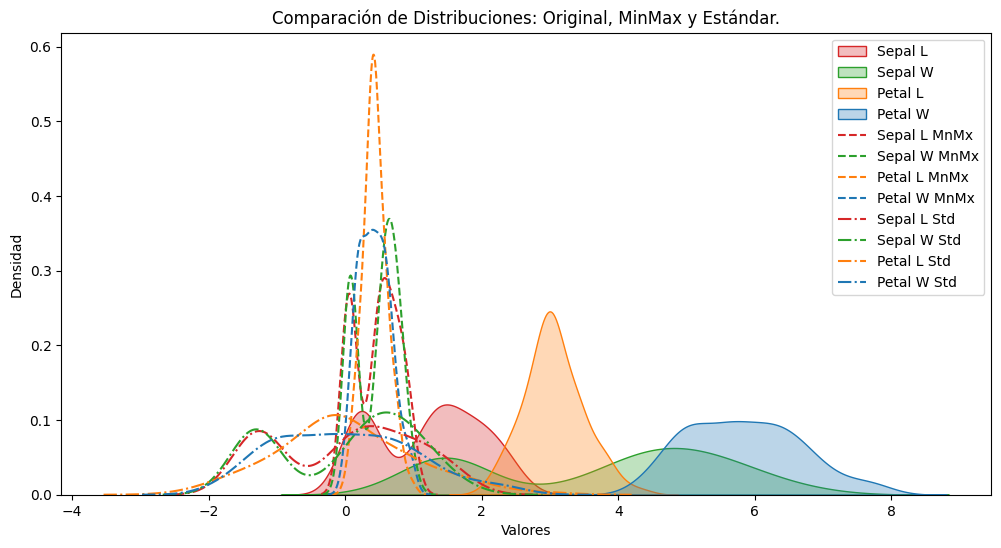

In [28]:
plt.figure(figsize=(12,6))
sns.kdeplot(data, label='Original', fill=True, alpha=0.3)
sns.kdeplot(data_minmax, label='Escalado MinMax', linestyle="--")
sns.kdeplot(data_standard, label='Escalado Estándar', linestyle="-.")

plt.title("Comparación de Distribuciones: Original, MinMax y Estándar.")
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend(["Sepal L",
            "Sepal W",
            "Petal L",
            "Petal W",
            "Sepal L MnMx",
            "Sepal W MnMx",
            "Petal L MnMx",
            "Petal W MnMx",
            "Sepal L Std",
            "Sepal W Std",
            "Petal L Std",
            "Petal W Std"
])

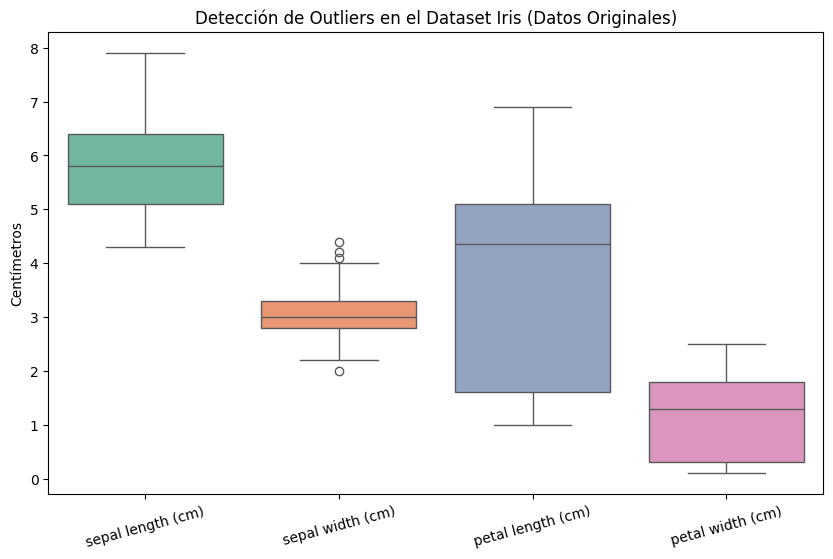

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette="Set2")
plt.title("Detección de Outliers en el Dataset Iris (Datos Originales)")
plt.ylabel("Centímetros")
plt.xticks(rotation=15)
plt.show()

MinMaxScaler es adecuado si:
1. Usaremos algoritmos basados en distancias (como KNN o K-means) pues evita dar mucho peso a valores grandes.
2. Se usará el dataset en redes neuronales, ya que convergen más rápido en el rango de 0 a 1.

StandardScaler se adecua cuando:
1. Usaremos algoritmos que asumen una distribución normal (como Regresión Lineal o Análisis de Componentes Principales).
2. Existen outliers, ya que StandardScaler evita que los valores extremos atípicos afecten demasiado la distribución, pues se basa en la desviación estándar.

Conclusión:
Dado que los outliers en Iris son mínimos y no extremos, ambas técnicas funcionan bien. Sin embargo, si estuvieramos trabajando con datos financieros o sensores que fallan, StandardScaler sería mucho más seguro.